<h3>Read each tile and store in a numpy array<h3>

In [2]:
from PIL import Image
import numpy as np
from tqdm import tqdm
i=0
#res = (test_str + "% d" + test_str) % test_int 
final_arr=np.zeros([2000,600,242])
for i in tqdm(range(242)):
    n="{0:0=3d}".format(i+1)
    img_n=('EO1H1480472016328110PZ_1GST/EO1H1480472016328110PZ/EO1H1480472016328110PZ_B'+'%s'+'_L1GST.TIF')%n
    #print(img_n)
    im = Image.open(img_n)
    imarray = np.array(im)
    final_arr[:,:,i]=imarray[500:2500,300:900]
#im.show()

100%|██████████| 242/242 [00:47<00:00,  5.08it/s]


In [5]:
final_arr=[]
from PIL import Image
import numpy as np
from tqdm import tqdm
i=0
#res = (test_str + "% d" + test_str) % test_int 
final_arr=np.zeros([3481,1021,242])
for i in tqdm(range(242)):
    n="{0:0=3d}".format(i+1)
    img_n=('EO1H1480472016328110PZ_1GST/EO1H1480472016328110PZ/EO1H1480472016328110PZ_B'+'%s'+'_L1GST.TIF')%n
    #img_n=(' EO1H1480472016328110PZ_1GST/ EO1H1480472016328110PZ_B'+'%s'+'_L1GST.TIF')%n
    #print(img_n)
    im = Image.open(img_n)
    imarray = np.array(im)
    #print(imarray.shape)
    final_arr[:,:,i]=imarray
#im.show()

100%|██████████| 242/242 [03:10<00:00,  1.27it/s]


In [6]:
print(final_arr.shape)

(3481, 1021, 242)


<h3>Extract lat long info from meta data<h3>

In [13]:
from pyproj import Proj, transform

inProj = Proj(init='epsg:32644')
outProj = Proj(init='epsg:4326')
x1,y1 = 453900.0,2384400.0
x2,y2 = transform(inProj,outProj,x1,y1)
print(x2,y2)

80.55474277553759 21.56187698122394


In [10]:
import rasterio as rio
lidar_dem_path='EO1H1430452010208110Kt_1GST/EO1H1430452010208110Kt/EO1H1430452010208110Kt_B001_L1GST.TIF'
with rio.open(lidar_dem_path) as lidar_dem:
    print(lidar_dem.meta)
    print(lidar_dem.tags(ns='IMAGE_STRUCTURE'))
    lidar_dem_mask = lidar_dem.dataset_mask()
    print(lidar_dem.crs)
    print(lidar_dem.bounds)
    print(lidar_dem.bounds)
    print(lidar_dem.res)

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 1061, 'height': 3521, 'count': 1, 'crs': CRS.from_epsg(32644), 'transform': Affine(29.97172478793591, 0.0, 453900.0,
       0.0, -29.991479693268957, 2490000.0)}
{'INTERLEAVE': 'BAND'}
EPSG:32644
BoundingBox(left=453900.0, bottom=2384400.0, right=485700.0, top=2490000.0)
BoundingBox(left=453900.0, bottom=2384400.0, right=485700.0, top=2490000.0)
(29.97172478793591, 29.991479693268957)


<h3>KMeans Prediction<h3>

In [ ]:
from PIL import Image
import numpy as np
from tqdm import tqdm
i=0
#res = (test_str + "% d" + test_str) % test_int 
labels=np.zeros([final_arr.shape[0],final_arr.shape[1],242])
for i in tqdm(range(final_arr.shape[0])):
  for j in range(final_arr.shape[1]):
    img_n=final_arr[i,j]
    imarray = pca.transform(img_n)
    #im = Image.open(img_n)
    #imarray = np.array(im)
    #imarray = pca.transform(imarray)
    prediction = kmeans.predict(imarray)
    labels[i,j]=prediction
#im.show()

In [ ]:
final_arr = pca.transform(final_arr)

In [ ]:
final_arr.shape

(3441, 1191, 242)

In [34]:
ls

 AWS.ipynb                      fish.csv
 Data_processing.ipynb          fish.pkl
 eds.ipynb                     'Hyperion Bands.xlsx'
 EO1H0350252010205110KU_1T/     LULClabel.kml
 EO1H1430452010208110Kt_1GST/   output.png
 EO1H1480472016328110PZ_1GST/


In [ ]:
import numpy
imarray = numpy.array(im)

In [ ]:
imarray.shape

(3441, 1191)

In [1]:
import gdal
import sys

# this allows GDAL to throw Python Exceptions
src_ds = gdal.Open( "EO1H0350252010205110KU_1T/EO1H0350252010205110KU_B191_L1T.TIF")
data = src_ds.ReadAsArray()

<h3>Applying PCA with a variance of 0.9<h3>

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
final_arr = final_arr.reshape((final_arr.shape[0]*final_arr.shape[1]),242)
final_arr = StandardScaler().fit_transform(final_arr) 

In [4]:
pca = PCA(0.9)
print('Hello')
data=pca.fit(final_arr)
pca.n_components_

Hello


7

In [5]:
data

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<h3>).9 variance explained by 7 principal components<h3>

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#final_arr = final_arr.reshape((final_arr.shape[0]*final_arr.shape[1]),final_arr.shape[2])
#final_arr = StandardScaler().fit_transform(final_arr) 
pca=PCA(n_components=7)
df = pca.fit_transform(final_arr)

In [ ]:
df_test = pca.transform()

In [ ]:
import pickle
with open('fish.pkl','wb') as f: 
  df=pickle.load(f)

<h3>Storing values in a CSV<h3>

In [8]:
import pandas as pd
df_ = pd.DataFrame(data = df
             , columns = ['feature_1', 'feature_2','feature_3','feature_4','feature_5','feature_6','feature_7'])

In [9]:
df_.to_csv('fish.csv')

In [35]:
import pandas as pd
df_=pd.read_csv('fish.csv')

In [36]:
df_.columns

Index(['Unnamed: 0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7'],
      dtype='object')

<h3>Values of PC1,PC2<h3>

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


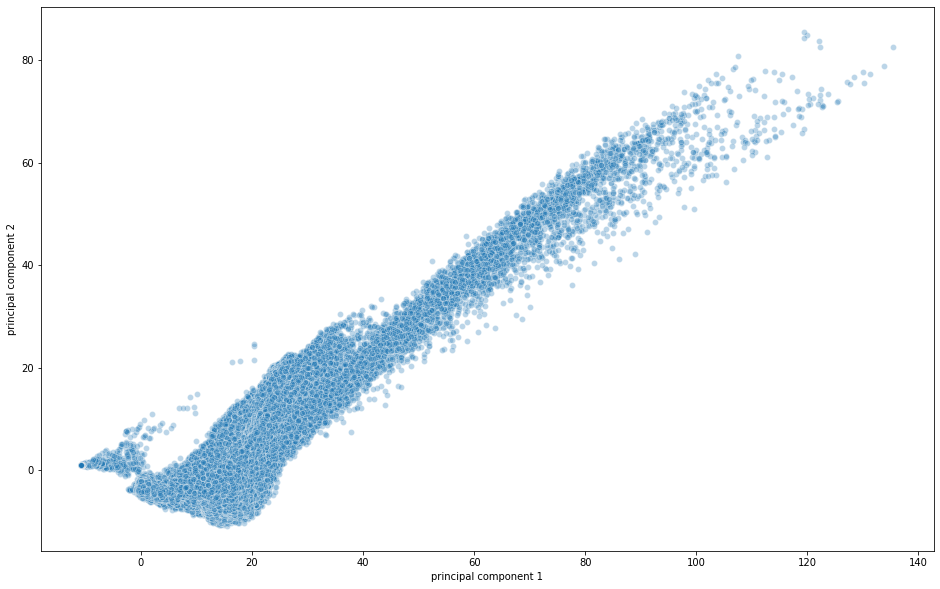

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    palette=sns.color_palette("hls", 10),
    data=df_,
    legend="full",
    alpha=0.3
)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_1 = scaler.fit_transform(df_)

In [44]:
df_1.shape

(1200000, 7)

In [42]:
df_=df_[['feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7']]

<h3>Searching for right number of clusters<h3>

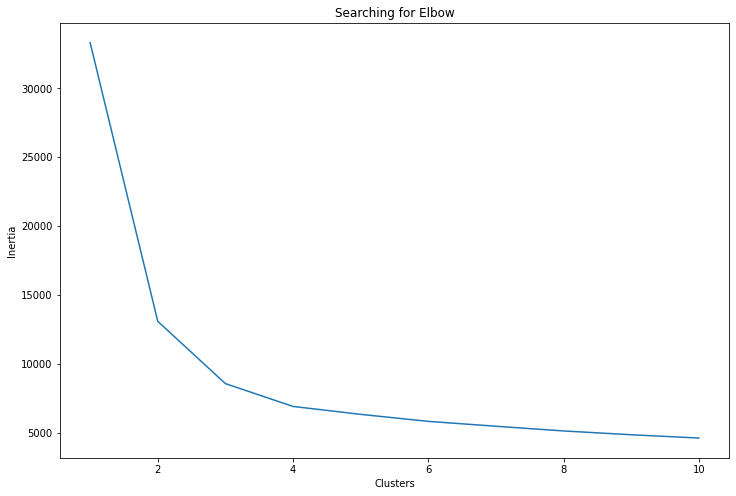

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(df_1)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()


<h3>Fit KMeans for 4 clusters<h3>

In [46]:
X=df_1
km3 = KMeans(n_clusters=4).fit(df_1)
'''
X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['principal component 1'], X['principal component 2'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()
'''

"\nX['Labels'] = km3.labels_\nplt.figure(figsize=(12, 8))\nsns.scatterplot(X['principal component 1'], X['principal component 2'], hue=X['Labels'], \n                palette=sns.color_palette('hls', 3))\nplt.title('KMeans with 3 Clusters')\nplt.show()\n"

<h3>Predictions on whole array<h3>

In [58]:
correct = 0
X=df_1
k=0
print(len(X))
label_arr=np.zeros([2000,600])
for i in tqdm(range(2000)):
  for j in range(600):
    predict_me = np.array(X[k].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    #print(predict_me.shape)
    prediction = km3.predict(predict_me)
    label_arr[i,j]=prediction
    k=k+1
    

  0%|          | 0/2000 [00:00<?, ?it/s]

1200000


100%|██████████| 2000/2000 [10:20<00:00,  3.22it/s]


In [59]:
#19.487130623923868 72.89154794453337
from collections import Counter
pot=label_arr.reshape([2000*600])
Counter(pot)

Counter({0.0: 249697, 1.0: 713635, 2.0: 124777, 3.0: 111891})

<h3>Saving results in a image<h3>

In [62]:
import cv2
predictions_Kolkata=label_arr
a,b=predictions_Kolkata.shape[:2]
blank_image = np.zeros(shape=[a,b,3], dtype=np. uint8)
for i in tqdm(range(0,a)):
    for j in range(0,b):
        if (predictions_Kolkata[i,j])==0:
            blank_image[i,j]=[128,0,0]
        if (predictions_Kolkata[i,j])==1:
            blank_image[i,j]=[0,0,0]
        if (predictions_Kolkata[i,j])==2:
            blank_image[i,j]=[42,42,165]
        if (predictions_Kolkata[i,j])==3:
            blank_image[i,j]=[128,128,128]
#Water Buildings OpenGrounds Vegetation Roads

100%|██████████| 2000/2000 [00:03<00:00, 552.68it/s]


In [63]:
cv2.imwrite('Mumbai_landuse.png',blank_image)

True